# Explore the effects of office location and year founded

In [1]:
from modules import *

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
# connect to mysql db, read cb_offices table as dataframe, disconnect
conn = dbConnect()
offices = dbTableToDataFrame(conn, 'cb_offices')
ipos = dbTableToDataFrame(conn, 'cb_ipos')
conn.close()

#### Look at offices and ipos dataframes & merge them

In [4]:
offices.head()

,address1,address2,city,country_code,created_at,description,id,latitude,longitude,object_id,office_id,region,state_code,updated_at,zip_code
0,710 - 2nd Avenue,Suite 1100,Seattle,USA,None,,1,47.6031220000,-122.3332530000,c:1,1,Seattle,WA,None,98104
1,4900 Hopyard Rd,Suite 310,Pleasanton,USA,None,Headquarters,2,37.6929340000,-121.9049450000,c:3,3,SF Bay,CA,None,94588
2,135 Mississippi St,None,San Francisco,USA,None,None,3,37.7647260000,-122.3945230000,c:4,4,SF Bay,CA,None,94107
3,1601 Willow Road,None,Menlo Park,USA,None,Headquarters,4,37.4160500000,-122.1518010000,c:5,5,SF Bay,CA,None,94025
4,Suite 200,654 High Street,Palo Alto,ISR,None,,5,None,None,c:7,7,SF Bay,CA,None,94301


In [5]:
ipos.head()

,created_at,id,ipo_id,object_id,public_at,raised_amount,raised_currency_code,source_description,source_url,stock_symbol,updated_at,valuation_amount,valuation_currency_code
0,2008-02-09 05:17:45,1,1,c:1654,1980-12-19,None,USD,None,None,NASDAQ:AAPL,2012-04-12 04:02:59,None,USD
1,2008-02-09 05:25:18,2,2,c:1242,1986-03-13,None,None,None,None,NASDAQ:MSFT,2010-12-11 12:39:46,None,USD
2,2008-02-09 05:40:32,3,3,c:342,1969-06-09,None,None,None,None,NYSE:DIS,2010-12-23 08:58:16,None,USD
3,2008-02-10 22:51:24,4,4,c:59,2004-08-25,None,None,None,None,NASDAQ:GOOG,2011-08-01 20:47:08,None,USD
4,2008-02-10 23:28:09,5,5,c:317,1997-05-01,None,None,None,None,NASDAQ:AMZN,2011-08-01 21:11:22,100000000000,USD


In [6]:
offices_ipos = pd.merge(offices, ipos, on='object_id')

In [7]:
offices_ipos.head()

,address1,address2,city,country_code,created_at_x,description,id_x,latitude,longitude,object_id,...,ipo_id,public_at,raised_amount,raised_currency_code,source_description,source_url,stock_symbol,updated_at_y,valuation_amount,valuation_currency_code
0,1601 Willow Road,None,Menlo Park,USA,None,Headquarters,4,37.4160500000,-122.1518010000,c:5,...,847,2012-05-18,18400000000,USD,Facebook Prices IPO at Record Value,http://online.wsj.com/news/articles/SB10001424...,NASDAQ:FB,2013-11-21 19:40:55,104000000000,USD
1,None,None,Dublin,IRL,None,Europe HQ,6975,53.3441040000,-6.2674940000,c:5,...,847,2012-05-18,18400000000,USD,Facebook Prices IPO at Record Value,http://online.wsj.com/news/articles/SB10001424...,NASDAQ:FB,2013-11-21 19:40:55,104000000000,USD
2,340 Madison Ave,None,New York,USA,None,New York,9084,40.7557162000,-73.9792469000,c:5,...,847,2012-05-18,18400000000,USD,Facebook Prices IPO at Record Value,http://online.wsj.com/news/articles/SB10001424...,NASDAQ:FB,2013-11-21 19:40:55,104000000000,USD
3,1355 Market St.,None,San Francisco,USA,None,,10,37.7768052000,-122.4169244000,c:12,...,1310,2013-11-07,1820000000,USD,Twitter Prices IPO Above Estimates At $26 Per ...,http://techcrunch.com/2013/11/06/twitter-price...,NYSE:TWTR,2013-11-07 04:18:48,18100000000,USD
4,2145 Hamilton Avenue,None,San Jose,USA,None,Headquarters,16,37.2950050000,-121.9300350000,c:20,...,26,1998-10-02,None,USD,None,None,NASDAQ:EBAY,2012-04-12 04:24:15,None,USD


### Look at distribution of valuation amounts where provided

The valuations are all 0.2e11 or less except for 3 that are 1e11+.

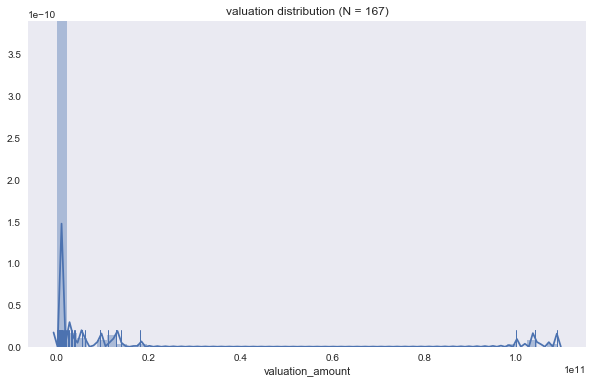

In [8]:
# plot valuation distribution; include number of companies considering
val = pd.to_numeric(offices_ipos[~offices_ipos.valuation_amount.isnull()].valuation_amount)
a=sns.distplot(val, rug=True);
a.set_title('valuation distribution (N = ' + str(len(val)) + ')');

We look at these 3 outliers and see that one is simply because the valuation amount is in JPY (currently 1 JPY = 0.0088 USD). The other two are Facebook and Amazon, which we know to be companies with very high valuationos. We will look at those with valuation_currency_code 'USD' moving forward.

In [9]:
offices_ipos[pd.to_numeric(offices_ipos.valuation_amount) > 0.8e11]

,address1,address2,city,country_code,created_at_x,description,id_x,latitude,longitude,object_id,...,ipo_id,public_at,raised_amount,raised_currency_code,source_description,source_url,stock_symbol,updated_at_y,valuation_amount,valuation_currency_code
0,1601 Willow Road,None,Menlo Park,USA,None,Headquarters,4,37.4160500000,-122.1518010000,c:5,...,847,2012-05-18,18400000000,USD,Facebook Prices IPO at Record Value,http://online.wsj.com/news/articles/SB10001424...,NASDAQ:FB,2013-11-21 19:40:55,104000000000,USD
1,None,None,Dublin,IRL,None,Europe HQ,6975,53.3441040000,-6.2674940000,c:5,...,847,2012-05-18,18400000000,USD,Facebook Prices IPO at Record Value,http://online.wsj.com/news/articles/SB10001424...,NASDAQ:FB,2013-11-21 19:40:55,104000000000,USD
2,340 Madison Ave,None,New York,USA,None,New York,9084,40.7557162000,-73.9792469000,c:5,...,847,2012-05-18,18400000000,USD,Facebook Prices IPO at Record Value,http://online.wsj.com/news/articles/SB10001424...,NASDAQ:FB,2013-11-21 19:40:55,104000000000,USD
91,1200 12th Ave,S # 1200,Seattle,USA,None,None,288,47.5923000000,-122.3172950000,c:317,...,5,1997-05-01,None,None,None,None,NASDAQ:AMZN,2011-08-01 21:11:22,100000000000,USD
360,"Roppongi-Hills Mori Tower, 6-10-1, Roppongi",Minato-ku,Tokyo,JPN,None,Headquarters,9085,None,None,c:15609,...,78,2008-12-17,None,None,None,None,3632,2010-10-08 06:47:07,108960000000,JPY


### Look at valuation amount by region

We want to determine the effect of location on IPO valuation. In particular, consider the median valuation and number of IPOs by region.

In [10]:
# look distribution of valuation amounts
offices_ipos_us = offices_ipos[offices_ipos.valuation_currency_code == 'USD']
val_us = pd.to_numeric(offices_ipos_us[~offices_ipos_us.valuation_amount.isnull()].valuation_amount)
region = offices_ipos_us[~offices_ipos_us.valuation_amount.isnull()].region
df_region_val = pd.concat([region, val], axis=1)
df_region_val.describe()

# look at valuation by region
#a=sns.boxplot(df_region_val.region, df_region_val.valuation_amount)
#a.set_ylabel('valuation amount')
#a.set_title('valuation by region')
#a.set_xticklabels(labels=df_region_val.region, rotation=90);

,valuation_amount
count,1.670000e+02
mean,4.417525e+09
std,1.784308e+10
min,3.860000e+04
25%,1.093750e+08
50%,3.150000e+08
75%,1.000000e+09
max,1.089600e+11


In [11]:
# perform calculations on a per region basis
reg = df_region_val.groupby(['region'])

In [15]:
# median ipo valuation by region
ave = reg.median()
ave.sort_values(by='valuation_amount', ascending=False)[0:4]

,valuation_amount
region,
Dublin,1.040000e+11
Shenzhen,1.100000e+10
Bangalore,9.310000e+09
Houston,6.000000e+09


SF Bay has the most IPOs with NY, London, and Seattle following. 

In [19]:
# sort regions by number of ipos (that had valutation amount) 
num = reg.count()
num.sort_values(by='valuation_amount', ascending=False)[0:10]

,valuation_amount
region,
SF Bay,34
New York,11
London,8
Seattle,7
Denver,6
Boston,6
Los Angeles,6
Chicago,5
Beijing,4


### Analysis of number of IPOs over time

In addition to looking at the value and region of companies that IPO we also look at historical trends in terms of the number of IPOs over time.

In [20]:
# plot number of ipos by year with different color for each region
# now don't filter to ones with valuation amount only
dt = pd.to_datetime(offices_ipos.public_at)
valAll = pd.to_numeric(offices_ipos.valuation_amount)
regionAll = offices_ipos.region

In [29]:
df_region_dt = pd.concat([regionAll, dt], axis=1)
time = df_region_dt.groupby([dt.dt.year])

In [30]:
# top counts by year
num = time.count()
num.sort_values(by='public_at', ascending=False).head(10)

,region,public_at
public_at,,
2013.0,154,154
2004.0,88,88
2011.0,83,83
2010.0,77,77
2012.0,51,51
2009.0,47,47
1999.0,47,47
2007.0,46,46
2008.0,44,44


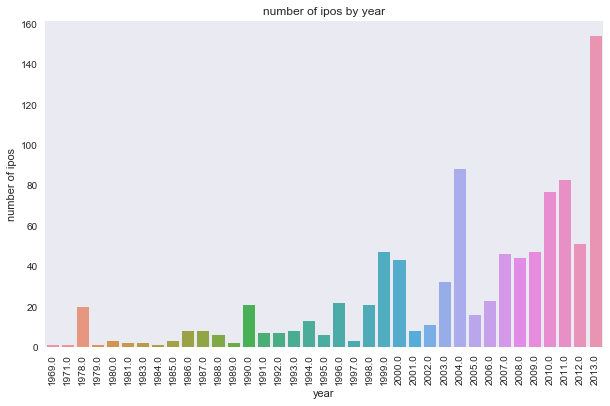

In [27]:
# barplot showing number of ipos by year
a=sns.barplot(num.public_at.index, num.public_at)
a.set_ylabel('number of ipos')
a.set_xlabel('year')
a.set_title('number of ipos by year');
a.set_xticklabels(labels=num.public_at.index, rotation=90);

### Incorporate cb_ojects into analysis

While we had been considering valuation amount from the IPOs data, we ultimately decided to instead consider funding_total_usd for the below analysis because it is a much richer dataset. We have N=27,874 instead of N=167.

In [31]:
conn = dbConnect()
objs = dbTableToDataFrame(conn, 'cb_objects')
conn.close()

In [32]:
objs.head()

,category_code,city,closed_at,country_code,created_at,created_by,description,domain,entity_id,entity_type,...,parent_id,permalink,region,relationships,short_description,state_code,status,tag_list,twitter_username,updated_at
0,web,Seattle,None,USA,2007-05-25 06:51:27,initial-importer,Technology Platform Company,wetpaint-inc.com,1,Company,...,None,/company/wetpaint,Seattle,17.0,None,WA,operating,"wiki, seattle, elowitz, media-industry, media-...",BachelrWetpaint,2013-04-13 03:29:00
1,games_video,Culver City,None,USA,2007-05-31 21:11:51,initial-importer,None,flektor.com,10,Company,...,None,/company/flektor,Los Angeles,6.0,None,CA,acquired,"flektor, photo, video",None,2008-05-23 23:23:14
2,games_video,San Mateo,None,USA,2007-08-06 23:52:45,initial-importer,,there.com,100,Company,...,None,/company/there,SF Bay,12.0,None,CA,acquired,"virtualworld, there, teens",None,2013-11-04 02:09:48
3,network_hosting,None,None,None,2008-08-24 16:51:57,None,None,mywebbo.com,10000,Company,...,None,/company/mywebbo,unknown,NaN,None,None,operating,"social-network, new, website, web, friends, ch...",None,2008-09-06 14:19:18
4,games_video,None,None,None,2008-08-24 17:10:34,None,None,themoviestreamer.com,10001,Company,...,None,/company/the-movie-streamer,unknown,NaN,None,None,operating,"watch, full-length, moives, online, for, free,...",None,2008-09-06 14:19:18


In [33]:
objs.columns

Index(['category_code', 'city', 'closed_at', 'country_code', 'created_at',
       'created_by', 'description', 'domain', 'entity_id', 'entity_type',
       'first_funding_at', 'first_investment_at', 'first_milestone_at',
       'founded_at', 'funding_rounds', 'funding_total_usd', 'homepage_url',
       'id', 'invested_companies', 'investment_rounds', 'last_funding_at',
       'last_investment_at', 'last_milestone_at', 'logo_height', 'logo_url',
       'logo_width', 'milestones', 'name', 'normalized_name', 'overview',
       'parent_id', 'permalink', 'region', 'relationships',
       'short_description', 'state_code', 'status', 'tag_list',
       'twitter_username', 'updated_at'],
      dtype='object')

In [34]:
len(objs.funding_total_usd[~objs.funding_total_usd.isnull()])

27874

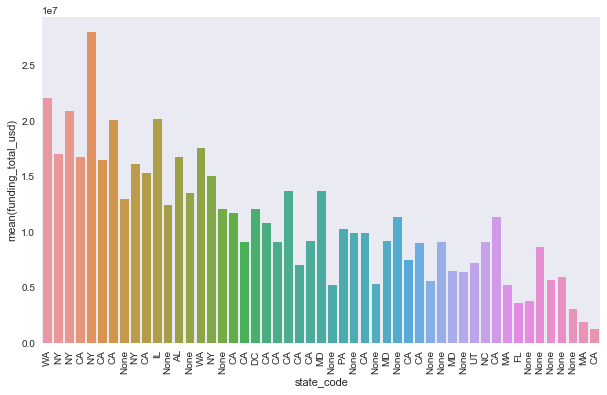

In [37]:
# plot mean funding_total_usd by state
objs_sorted = objs[~objs.funding_total_usd.isnull()].sort_values(by='funding_total_usd', ascending=False)
a=sns.barplot(objs_sorted['state_code'], pd.to_numeric(objs_sorted['funding_total_usd']), ci=False);
a.set_xticklabels(objs_sorted['state_code'], rotation=90);

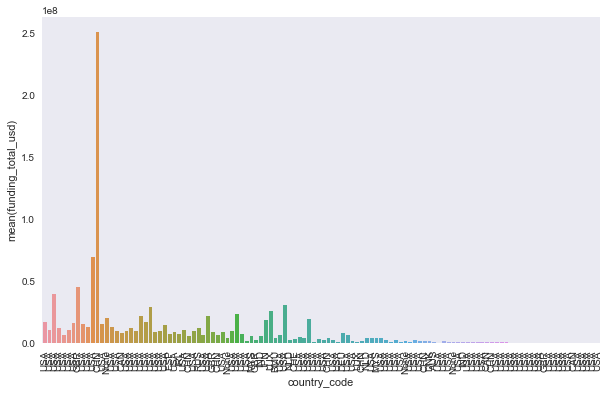

In [38]:
# plot mean funding_total_usd by country
objs_sorted = objs[~objs.funding_total_usd.isnull()].sort_values(by='funding_total_usd', ascending=False)
a=sns.barplot(objs_sorted['country_code'], pd.to_numeric(objs_sorted['funding_total_usd']), ci=False);
a.set_xticklabels(objs_sorted['country_code'], rotation=90);

In [39]:
# group by date founded to do analysis on the emergence of new companies over time
dt = pd.to_datetime(objs.founded_at)
df_fund_dt = pd.concat([objs.funding_total_usd, dt], axis=1)
founded = df_fund_dt.groupby([dt.dt.year])

In [45]:
# top counts by year
num_found = founded.count()
num_found.sort_values(by='founded_at', ascending=False)['founded_at'].head(10)

founded_at
2011.0    11884
2012.0    11158
2010.0    10858
2009.0     9805
2008.0     8502
2007.0     6765
2013.0     6280
2006.0     4689
2005.0     3580
2004.0     2828
Name: founded_at, dtype: int64

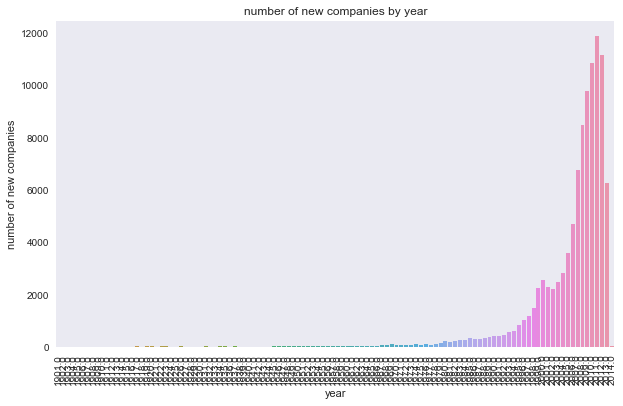

In [27]:
# plot number of new companies by year
a=sns.barplot(num_found.founded_at.index, num_found.founded_at)
a.set_ylabel('number of new companies')
a.set_xlabel('year')
a.set_title('number of new companies by year');
a.set_xticklabels(labels=num_found.founded_at.index, rotation=90);

In [47]:
# company lifespan: closed_at - founded_at
start = pd.to_datetime(objs.founded_at)
end = pd.to_datetime(objs.closed_at)
life = end.dt.year - start.dt.year

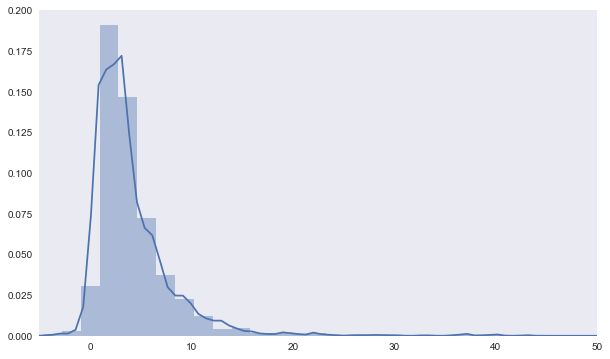

In [50]:
a=sns.distplot(life[~life.isnull()]);
a.set_xlim(-5, 50);

In [52]:
# there are 27 with a life < 0 showing data entry for this data set was flawed. 
life[life < 0].describe()

count    27.000000
mean     -7.851852
std      10.614590
min     -40.000000
25%      -9.500000
50%      -3.000000
75%      -1.000000
max      -1.000000
dtype: float64

In [53]:
# consider those with positive life
life_pos = life[life>0]
life_pos[~life_pos.isnull()].describe()

count    2013.000000
mean        4.384004
std         4.359592
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        53.000000
dtype: float64

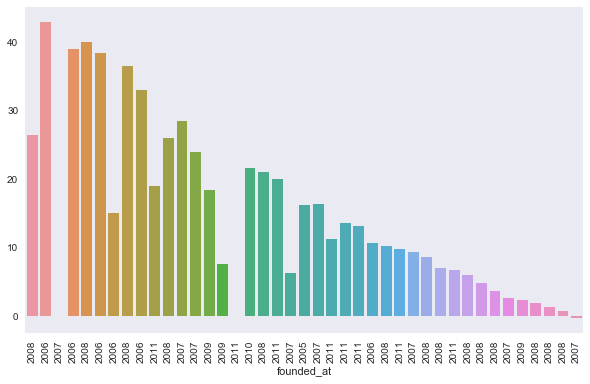

In [54]:
# see whether companies tend to have longer of shorter lifespans based on when they were founded
a=sns.barplot(start[~life.isnull()].dt.year, life[~life.isnull()], ci=None);
a.set_xticklabels(start[~life.isnull()].dt.year, rotation=90);

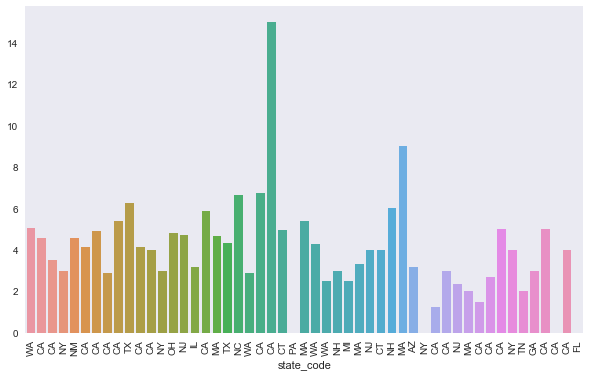

In [66]:
# see whether companies tend to have longer or shorter lifespans based on region
a=sns.barplot(objs.state_code[~objs.state_code.isnull()], life[~objs.state_code.isnull()], ci=None);
a.set_xticklabels(objs.state_code[~objs.state_code.isnull()], rotation=90);